# COVID 19 API

In [56]:
import requests
import pandas as pd
import json

# India Cases and Deaths

In [90]:

# Make a GET request to the COVID-19 API endpoint for daily deaths and positive cases data
url = "https://api.covid19api.com/country/india?from=2020-01-01T00:00:00Z&to=2023-01-01T00:00:00Z"
response = requests.get(url)

# Parse the JSON response and extract the daily deaths and positive cases data
data = json.loads(response.text)
dates = [d['Date'] for d in data]
deaths = [d['Deaths'] for d in data]
cases = [d['Confirmed'] for d in data]

# Create a pandas dataframe to store the daily deaths and positive cases data
india_df = pd.DataFrame({'Date': dates, 'Deaths': deaths, 'Cases': cases})

india_df['Date'] = pd.to_datetime(india_df['Date']).dt.date
india_df['Date'] = india_df['Date'].astype(str)

# Display the first 5 rows of the dataframe
india_df



,Date,Deaths,Cases
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,0,0
3,2020-01-25,0,0
4,2020-01-26,0,0
...,...,...,...
1071,2022-12-28,530698,44679139
1072,2022-12-29,530699,44679382
1073,2022-12-30,530702,44679608
1074,2022-12-31,530705,44679873


# India Vaccinations

Data source: https://github.com/owid/covid-19-data

In [91]:

# Open the JSON file and load the data
with open('owid-covid-data.json', 'r') as f:
    data = json.load(f)


# Extract the data for "IND"
india_data = data['IND']['data']

# Extract the "date" and "total_vaccinations" data for "IND"
india_vaccination_data = [(entry['date'], entry['total_vaccinations']) for entry in india_data if 'total_vaccinations' in entry]

# Create a Pandas DataFrame
vaccinations_df = pd.DataFrame(india_vaccination_data, columns=['Date', 'Total Vaccinations'])

# Convert the "total vaccinations" column to a standard decimal format
pd.options.display.float_format = '{:.2f}'.format
vaccinations_df['Total Vaccinations'] = vaccinations_df['Total Vaccinations'].astype(float)

vaccinations_df['Date'] = vaccinations_df['Date'].astype(str)

# Print the DataFrame
vaccinations_df

# # Assuming your DataFrame is named 'df'
# print(vaccinations_df['Date'].dtype)
# print(india_df['Date'].dtype)


,Date,Total Vaccinations
0,2021-01-15,0.00
1,2021-01-16,191181.00
2,2021-01-17,224301.00
3,2021-01-18,454049.00
4,2021-01-19,674835.00
...,...,...
752,2023-02-28,2206361497.00
753,2023-03-01,2206367997.00
754,2023-03-02,2206375298.00
755,2023-03-03,2206382304.00


# Merge


In [100]:
#Merging the DataFrames on the 'Date' column

merged_df = pd.merge(india_df, vaccinations_df, on='Date')

merged_df['New COVID Cases'] = merged_df['Cases'].diff().fillna(0).astype(int)
merged_df['New Deaths'] = merged_df['Deaths'].diff().fillna(0).astype(int)
merged_df['New Vaccinations'] = merged_df['Total Vaccinations'].diff().fillna(0).astype(int)

#Dropping columns
final_covid_df = merged_df.drop(['Cases', 'Deaths', 'Total Vaccinations'], axis=1)

final_covid_df

,Date,New COVID Cases,New Deaths,New Vaccinations
0,2021-01-15,0,0,0
1,2021-01-16,15144,181,191181
2,2021-01-17,13788,145,33120
3,2021-01-18,10050,137,229748
4,2021-01-19,13816,162,220786
...,...,...,...,...
690,2022-12-28,268,2,90596
691,2022-12-29,243,1,95882
692,2022-12-30,226,3,84200
693,2022-12-31,265,3,88286


# Visualizations 

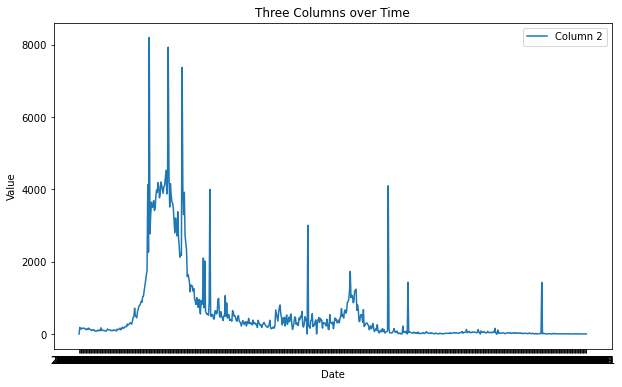

In [97]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the three columns against the date column
#plt.plot(merged_df['Date'], merged_df['New COVID Cases'], label='Column 1')
plt.plot(merged_df['Date'], merged_df['New Deaths'], label='Column 2')
#plt.plot(merged_df['Date'], merged_df['Vaccinations'], label='Column 3')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Three Columns over Time')

# Add legend
plt.legend()

# Show the plot
plt.show()
